@Author: Pooja
@Date: 18-11-2024
@Last modified by:Pooja
@Last modified Date:11-10-2024
@Title: Single layer neural network to predict whether customer will exit

importing libraries

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

load dataset

In [2]:
url = 'https://drive.google.com/uc?id=1E0EURgsF3L9Bt5hnOalE0d4Tw9mIOgTn'  # Corrected link format
df = pd.read_csv(url,delimiter=';')

print(df.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


load dataset

In [3]:
url = 'https://drive.google.com/uc?id=1E0EURgsF3L9Bt5hnOalE0d4Tw9mIOgTn'  # Corrected link format
df = pd.read_csv(url,delimiter=';')

print(df.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


handling outliers

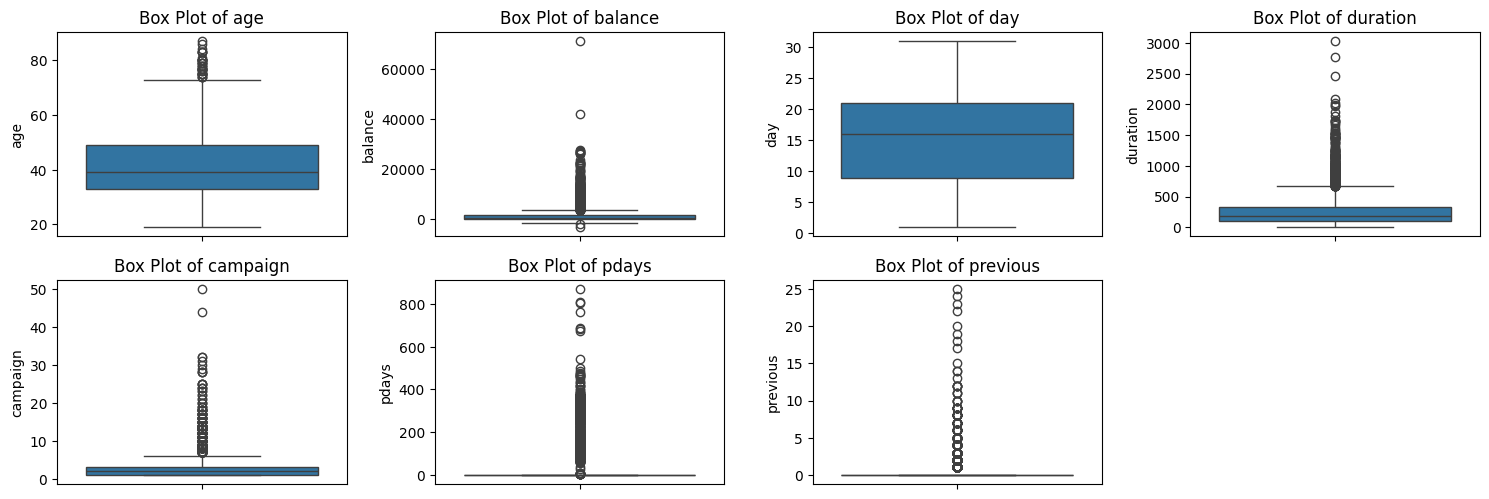

In [4]:
import matplotlib.pyplot as plt
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()        # Select only numerical columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()

plt.show()

Original data shape: (4521, 17)
Filtered data shape: (2803, 17)


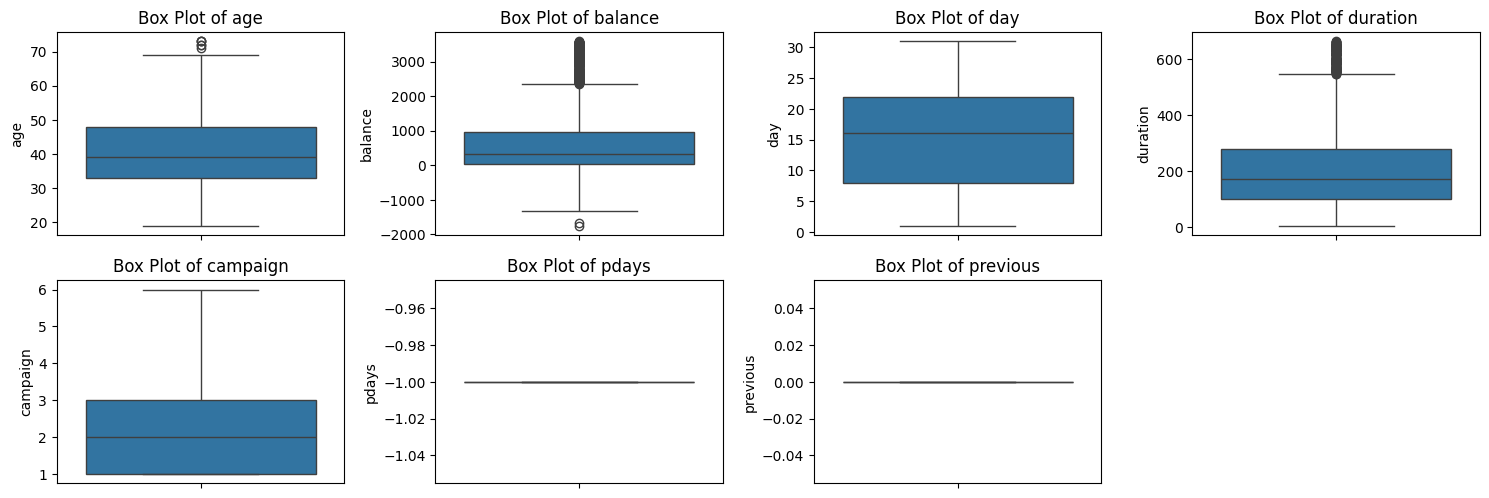

In [5]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the data to remove outliers
df_filtered = df[~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)]

# Display the shape of the original and filtered data
print(f'Original data shape: {df.shape}')
print(f'Filtered data shape: {df_filtered.shape}')

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df_filtered[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

Handling categorical values

In [6]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

Define features (X) and target (y)

In [10]:
X = df.drop(columns=['y'])  # Features are all columns except 'y'
y = df['y'].map({'yes': 1, 'no': 0})                  # Target variable


Scaling Dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Building

In [14]:
model = Sequential()

# Input layer and first hidden layer with 128 neurons and ReLU activation
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.2))     # Add dropout to prevent overfitting


# Second hidden layer with 64 neurons
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout

model.add(Dense(32, activation='relu'))

# Output layer with 1 neuron (binary classification) and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)  # Convert predictions to 0 or 1

Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6300 - loss: 0.5857 - val_accuracy: 0.8936 - val_loss: 0.2754
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8849 - loss: 0.2770 - val_accuracy: 0.8964 - val_loss: 0.2577
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8876 - loss: 0.2792 - val_accuracy: 0.8992 - val_loss: 0.2517
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9049 - loss: 0.2418 - val_accuracy: 0.8964 - val_loss: 0.2511
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8935 - loss: 0.2503 - val_accuracy: 0.9006 - val_loss: 0.2495
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8967 - loss: 0.2506 - val_accuracy: 0.8964 - val_loss: 0.2513
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8894 - loss: 0.2556 - val_accuracy: 0.8950 - val_loss: 0.2532
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9081 - loss: 0.2221 - val_accuracy: 0.8936 - val_loss:

Model performance

In [15]:
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', class_report)

Accuracy: 0.8861878453038674
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       807
           1       0.45      0.23      0.31        98

    accuracy                           0.89       905
   macro avg       0.68      0.60      0.62       905
weighted avg       0.86      0.89      0.87       905

